In [1]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
%%time

#Clone repository from github.com
!git clone https://github.com/ultralytics/yolov5

CPU times: total: 15.6 ms
Wall time: 176 ms


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!pip install ultralytics

In [4]:
!pip install -q -U pycocotools

In [29]:
# !pip install -q -r yolov5/requirements.txt               
# !cp yolov5/requirements.txt                            

In [6]:
img_h, img_w, num_channels = (380,676,3)

In [7]:
df = pd.read_csv(r"D:\projects\python\object detection\data\train_solution_bounding_boxes (1).csv")
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [8]:
df.rename(columns={'image':'image_id'}, inplace=True)              #rename column image to image_ID
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])   #removes file extension from image_id
df['x_center'] = (df['xmin'] + df['xmax'])/2                       
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [9]:
index = list(set(df.image_id))              #create unique image ID as set removes duplicate values
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f"D:/projects/python/object detection/data/training_images/{image}.jpg")
                                    #functn from OpenCV library , ready img from file & returns numpy array containing pixels
# img.shape

Image ID: vid_4_13760


In [10]:
 img.shape

(380, 676, 3)

Image ID: vid_4_980


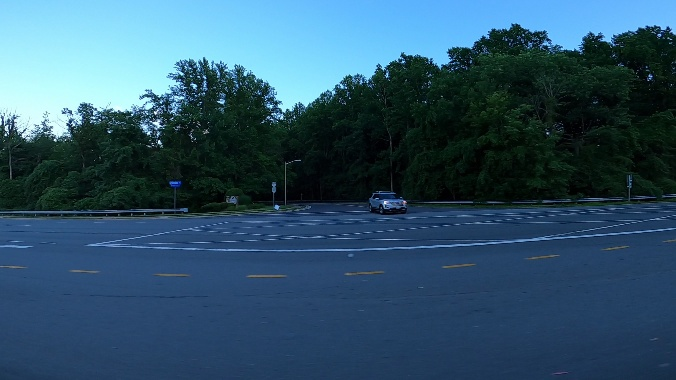

In [11]:
image = random.choice(index)
print("Image ID: %s"%(image))
Image(filename=f"D:/projects/python/object detection/data/training_images/{image}.jpg",width=800)

In [12]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source "D:\projects\python\object detection\data\testing_images"

detect: weights=['yolov5/yolov5s.pt'], source=D:\projects\python\object detection\data\testing_images, data=yolov5\data\coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-218-g9e97ac3 Python-3.9.12 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING  --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 D:\projects\python\object detection\data\testing_images\vid_5_25100.jpg: 416x704 (no detections), 184.6ms
image 2/175 D:\projects\python\object detection\data\testing_images\vid_5_25120.jpg: 416x704 (no detections), 183.5ms
image 3/

In [13]:
predicted_files = []

for (dirpath, dirnames, filenames) in os.walk("C:/Users/basha/yolo5/yolov5/runs/detect/exp"):
    predicted_files.extend(filenames)
    dirnames.extend(dirnames)
    
print("Names of 5 predicted images")
predicted_files[:5]

Names of 5 predicted images


['vid_5_25100.jpg',
 'vid_5_25120.jpg',
 'vid_5_25140.jpg',
 'vid_5_25160.jpg',
 'vid_5_25180.jpg']

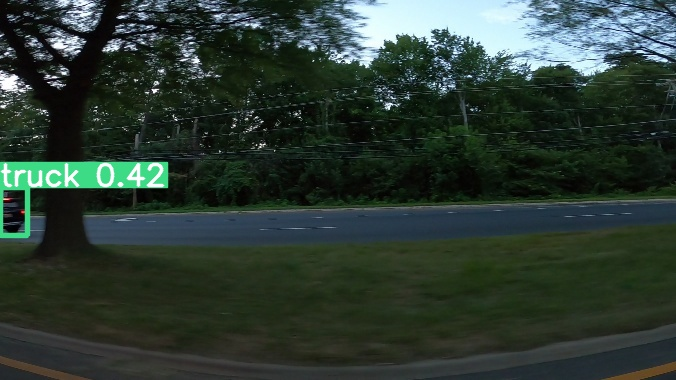

In [24]:
Image(filename = f'C:/Users/basha/yolo5/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

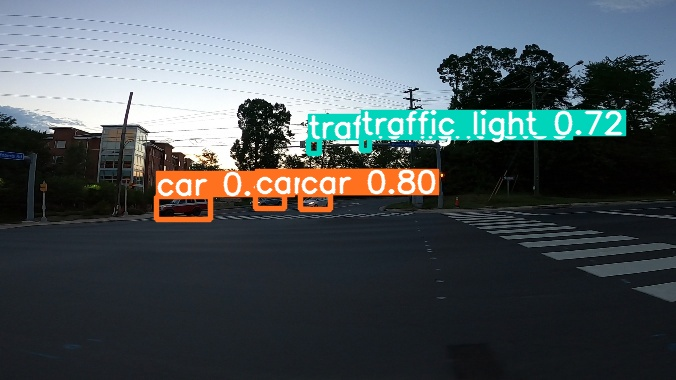

In [25]:
Image(filename = f'C:/Users/basha/yolo5/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

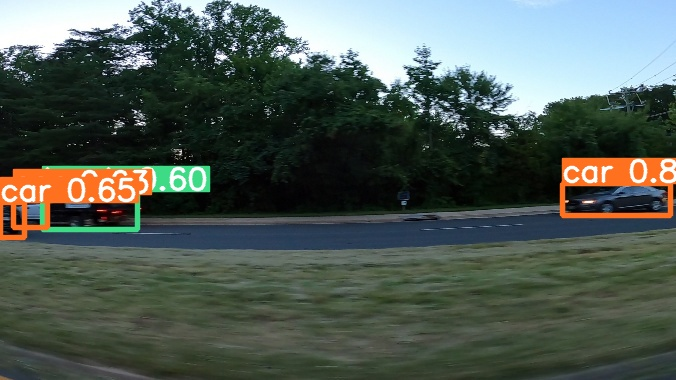

In [28]:
Image(filename = f'C:/Users/basha/yolo5/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

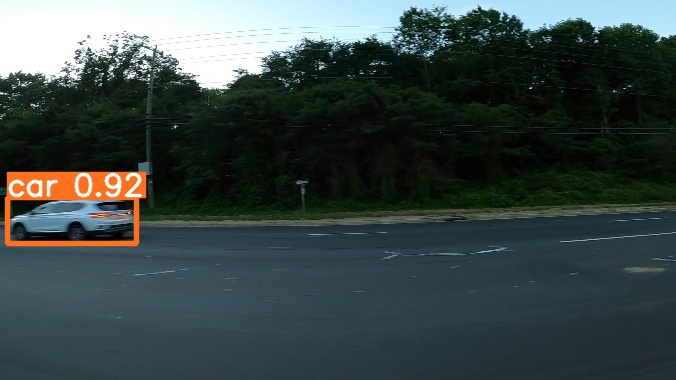

In [27]:
Image(filename = f'C:/Users/basha/yolo5/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)